# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images

Similarity comparation is made both on text and images



Multi-lauguage will be added

In [39]:
import os
import cv2
import glob
import spacy
import time
import datetime
import data_helpers
import process_image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [40]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
files_grabbed = []
for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 81 images loaded


In [41]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[17]
lang = langs[35]
print("-----Will use language:  '%s'" % (lang))

Will use tool 'Tesseract (sh)'
Available languages: kor, kor_vert, Thaana, kat_old, Syriac, mri, chr, ron, isl, lao, ind, mal, Arabic, Georgian, Hebrew, pol, Tamil, eng, san, jpn_vert, Japanese_vert, Oriya, oci, Fraktur, nld, mlt, lat, snd, hin, ltz, hat, Japanese, chi_tra_vert, Bengali, mya, spa, sun, msa, nep, Canadian_Aboriginal, Myanmar, srp, Cherokee, osd, cym, hun, ita_old, kir, Sinhala, chi_sim_vert, Vietnamese, iku, Cyrillic, rus, Gurmukhi, Devanagari, cat, pan, heb, que, chi_tra, Tibetan, Telugu, Malayalam, Gujarati, cos, kaz, mon, Ethiopic, syr, hrv, jav, ita, Khmer, pus, kat, Kannada, kur_ara, HanT, ces, ori, ceb, spa_old, chi_sim, slk, jpn, Latin, khm, lit, slv, swe, nor, HanS, Hangul, HanT_vert, swa, Armenian, Thai, sqi, kan, por, srp_latn, mkd, Lao, HanS_vert, hye, sin, lav, Hangul_vert, mar, Greek
-----Will use language:  'spa'


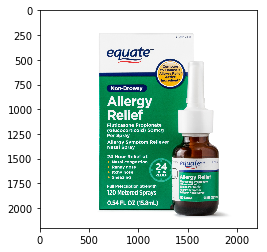

In [42]:
# Get some images to show
randindex = randint(0, len(files_grabbed)-1)
img = cv2.imread(files_grabbed[randindex])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [43]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(img), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------
NDC 49035-200-01

equate”

Compare

           
   

Active

IAEA

PNL
|

Fluticasone Propionate
(Glucocorticoid) 50mcg
Per Spray

Allergy Symptom Reliever
Nasal Spray

TIRAS A
+ Nasal congestion
+ Runny nose

A NAS

+ Sneezing

Full Prescription Strength

MIOS ETEEA
AA OA ER

to Flonaser
Allergy Relief

Ingredient*

    
 

  

LAA

AAA
A)
AT
ES LL)
AE

AA A
------Following is cleaned text------
ndc 49035-200-01equate”compare  activeiaeapnl|fluticasone propionate(glucocorticoid) 50mcgper sprayallergy symptom relievernasal spraytiras a+ nasal congestion+ runny nosea nas+ sneezingfull prescription strengthmios eteeaaa oa erto flonaserallergy reliefingredient*   laaaaaa)ates ll)aeaa a


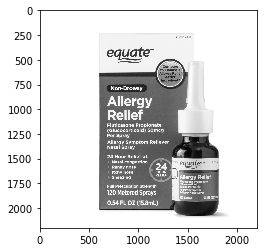

In [44]:
newimg = process_image.improve(files_grabbed[randindex])
newimgshow = cv2.cvtColor(newimg, cv2.COLOR_GRAY2RGB)
plt.imshow(newimgshow)

In [45]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------
NDC 49035-200-01

equate”

    
  
    
 

AA NE

PNL
|

METIA e ES
(Glucocorticoid) 50mcg
LES EN

Allergy Symptom Reliever
Nasal Spray

NTRA
Nasal congestion

NALES 24

ANALES Bu
Sneezing

A Ele)

MILE EEE | ich AAA
OA ER

120 Sprays META
------Following is cleaned text------
ndc 49035-200-01equate”    aa nepnl|metia e es(glucocorticoid) 50mcgles enallergy symptom relievernasal sprayntranasal congestionnales 24anales busneezinga ele)mile eee | ich aaaoa er120 sprays meta


In [46]:
#Following we write all recognize all images and write to database.
print('Following we write all recognize all images \n and write all text to database.')
with open ('result.txt', 'w', encoding = 'utf-8') as output:
    count = 1
    for f in files_grabbed:
        newimg = process_image.improve(f)
        txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
        #txt = pyocr.libtesseract.image_to_string(Image.open(f), lang=lang, builder=pyocr.builders.TextBuilder())
        #if len(txt) < 10:
        #    os.remove(f)
        cleantxt = data_helpers.process_raw(txt)
        #head, tail = os.path.split(f)
        #output.write(tail + '\n')
        output.write(cleantxt + '\n')
        time_str = datetime.datetime.now().isoformat()
        if count%5 == 0:
            print("{}: image {} processed, total {:g}".format(time_str, count, len(files_grabbed)))
        #print('image ' + str(count) + '/' + str(len(files_grabbed)) + ' is processed')
        count += 1
        #if len(cleantxt) > 7:
        #    print('Image ' + str(count) + ' is processed:  ' + cleantxt)
        #    count += 1

Following we write all recognize all images 
 and write all text to database.
2018-07-23T15:28:52.758434: image 5 processed, total 81
2018-07-23T15:28:59.913467: image 10 processed, total 81
2018-07-23T15:29:05.793385: image 15 processed, total 81
2018-07-23T15:29:12.981886: image 20 processed, total 81
2018-07-23T15:29:17.020611: image 25 processed, total 81
2018-07-23T15:29:28.064320: image 30 processed, total 81
2018-07-23T15:29:34.663710: image 35 processed, total 81
2018-07-23T15:29:40.639186: image 40 processed, total 81
2018-07-23T15:29:44.833974: image 45 processed, total 81
2018-07-23T15:29:48.516643: image 50 processed, total 81
2018-07-23T15:29:53.635648: image 55 processed, total 81
2018-07-23T15:29:59.017280: image 60 processed, total 81
2018-07-23T15:30:04.781511: image 65 processed, total 81
2018-07-23T15:30:09.577326: image 70 processed, total 81
2018-07-23T15:30:14.605611: image 75 processed, total 81
2018-07-23T15:30:22.710669: image 80 processed, total 81


There are 5 images loaded


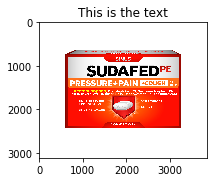

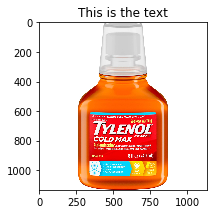

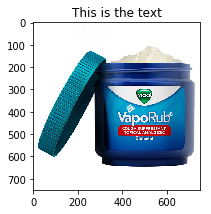

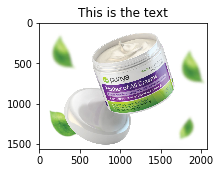

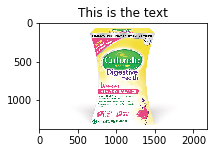

In [68]:
#-Load all images for test
testypes = ('testimg/*.jpg', 'testimg/*.png','testimg/*.bmp', 'testimg/*.jpeg',
          'testimg/*.JPG', 'testimg/*.PNG', 'testimg/*.BMP', 'testimg/*.JPEG') 
test_grabbed = []
for files in testypes:
    test_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(test_grabbed)) + ' images loaded')

for img in test_grabbed:
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(3,6))
    plt.title('This is the text')
    plt.imshow(img)
    
    

In [ ]:
gray_test = process_image.improve('3.jpg')
gray_test = cv2.cvtColor(gray_test, cv2.COLOR_GRAY2RGB)
plt.imshow(gray_test)

In [ ]:
test_txt = tool.image_to_string(Image.fromarray(gray_test), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(test_txt)

print('------Following is cleaned text------')
clean_test = data_helpers.process_raw(test_txt)
print(clean_test)

In [14]:
with open('result.txt', 'r') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
print(len(content))
print(content[5])

99
ndc 0220-9325-04su hoarsenessred, dry and sore throat’throatcalmhomeopathic medicine  = non-drowsy@ no known drug interactions@ melts under your tongue  cpv aequick-dissolvingbo .@ n° tabletsmoya cs ete th) neen ec len ects


31
33
21
24
24
20
27
20
34
31
18
28
30
36
25
24
39
26
46
41
25
0
28
25
35
0
30
37
0
0
29
24
27
0
41
23
20
28
36
32
23
41
38
29
26
0
9
37
24
42
29
0
35
35
0
0
39
26
19
20
18
17
36
29
28
23
41
20
72
17
23
36
14
23
36
0
26
34
0
31
0
42
35
20
35
0
0
28
0
35
26
31
26
0
25
30
67
43
36


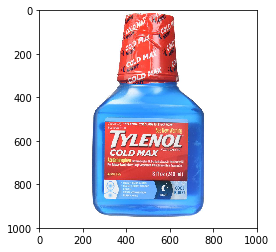

In [15]:
# get the maximum similar image
max_ratio, target = 0, 0
for index, val in enumerate(content):
    ratio = fuzz.partial_ratio(val, clean_test)
    if ratio > max_ratio:
        max_ratio = ratio
        target = index 
    print(str(ratio))
    
target_img = cv2.imread(files_grabbed[target])
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
plt.imshow(target_img)